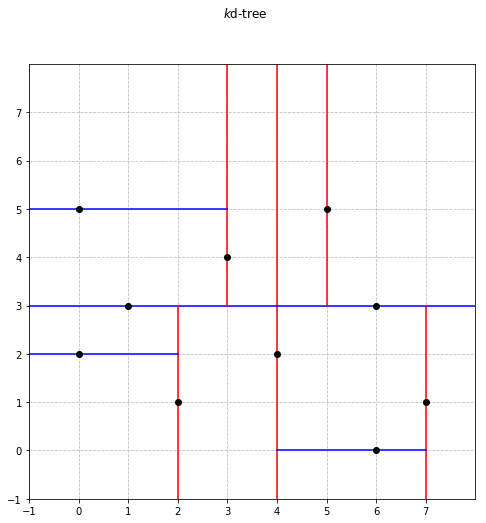

In [1]:
%matplotlib inline

filename="./points.txt"
point_x=[]
point_y=[]
point_list = []
with open(filename) as f:
    data = f.read().splitlines()
    for i in data:
        point_list.append((float(i[0]),float(i[2])))
        point_x+=[float(i[0])]    #i[1] is blank
        point_y+=[float(i[2])]
    
#print(point_list)

point={
    'x':point_x,
    'y':point_y
}
#print(point)


from scipy import spatial
import numpy as np

point_x=np.array(point_x)
point_y=np.array(point_y)
cor=np.array(list(zip(point_x.ravel(), point_y.ravel())))
tree = spatial.cKDTree(cor,leafsize=4)


#we use this
from collections import namedtuple
from operator import itemgetter
from pprint import pformat
import numpy as np
import matplotlib.pyplot as plt
 
class Node(namedtuple('Node', 'location left_child right_child')):
 
    def __repr__(self):
        return pformat(tuple(self))
 
def kdtree(point_list, depth=0):

    # assumes all points have the same dimension
    try:
        k = len(point_list[0])
    except IndexError:
        return None
 
    # Select axis based on depth so that axis cycles through
    # all valid values
    axis = depth % k
 
    # Sort point list and choose median as pivot element
    point_list.sort(key=itemgetter(axis))
    median = len(point_list) // 2         # choose median
 
    # Create node and construct subtrees
    return Node(location=point_list[median],left_child=kdtree(point_list[:median], depth + 1),right_child=kdtree(point_list[median + 1:], depth + 1))
    
def plotTree(tree, min_x, max_x, min_y, max_y, prev_node, branch, depth=0):
    line_width = [1.5]
    cur_node = tree.location         # current tree's node
    left_branch = tree.left_child    # its left branch
    right_branch = tree.right_child
    if depth > len(line_width)-1:
        ln_width = line_width[len(line_width)-1]
    else:
        ln_width = line_width[depth]
 
    k = len(cur_node)
    axis = depth % k
     
    # draw a vertical splitting line
    if axis == 0:
 
        if branch is not None and prev_node is not None:
 
            if branch:
                max_y = prev_node[1]
            else:
                min_y = prev_node[1]
 
        plt.plot([cur_node[0],cur_node[0]], [min_y,max_y], linestyle='-', color='red', linewidth=ln_width)
 
    # draw a horizontal splitting line
    elif axis == 1:
 
        if branch is not None and prev_node is not None:
 
            if branch:
                max_x = prev_node[0]
            else:
                min_x = prev_node[0]
 
        plt.plot([min_x,max_x], [cur_node[1],cur_node[1]], linestyle='-', color='blue', linewidth=ln_width)
 
    # draw the current node
    plt.plot(cur_node[0], cur_node[1], 'ko')
 
    # draw left and right branches of the current node
    if left_branch is not None:
        plotTree(left_branch, min_x, max_x, min_y, max_y, cur_node, True, depth+1)
        
    if right_branch is not None:
        plotTree(right_branch, min_x, max_x, min_y, max_y, cur_node, False, depth+1)
 
#print(cor)
delta = 8
max_val = 0
min_val = 7

KDT = kdtree(point_list)


# Plot four different levels of the KD tree
plt.figure("K-d Tree", figsize=(8, 8))
plt.axis( [min_val-delta, max_val+delta, min_val-delta, max_val+delta] )
 
plt.grid(b=True, which='major', color='0.75', linestyle='--')
plt.xticks([i for i in range(min_val-delta, max_val+delta, 1)])
plt.yticks([i for i in range(min_val-delta, max_val+delta, 1)])

plotTree(KDT, min_val-delta, max_val+delta, min_val-delta, max_val+delta, None, None)

plt.suptitle('$k$d-tree')
plt.show()


